<a href="https://colab.research.google.com/github/nadinne94/correlacao-regressao/blob/main/Correlacao_regressao_individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Individual: Correlação e Regressão Simples/Multivariada

## Bibliotecas

In [ ]:
# manipulação de dados numéricos e tabulares
import pandas as pd
import numpy as np

# plotagem de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# cálculos estatísticos
#statsmodels
from scipy.stats import stats

## 1ª Parte

In [ ]:
# importando o df
df_house = pd.read_csv('/content/drive/MyDrive/projeto_regressao/kc_house_data.csv')
df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,3222049055,20150116T000000,650000.0,3,1.75,2800,19386,1.0,y,4,...,8,1400,1400,1965,0,98198,47.3554,-122.324,3270,31450
9995,7352200100,20150224T000000,1360000.0,2,1.75,2620,14138,2.0,y,4,...,8,2120,500,1931,1991,98125,47.7142,-122.277,1830,8279
9996,3124059023,20150213T000000,1960000.0,3,1.75,3330,12566,1.0,y,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
9997,7352200025,20141013T000000,1190000.0,2,1.75,2080,8112,1.0,y,4,...,8,1040,1040,1939,1984,98125,47.7134,-122.277,2030,8408


In [ ]:
# análise geral dos dados
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9999 non-null   int64  
 1   date           9999 non-null   object 
 2   price          9999 non-null   float64
 3   bedrooms       9999 non-null   int64  
 4   bathrooms      9999 non-null   float64
 5   sqft_living    9999 non-null   int64  
 6   sqft_lot       9999 non-null   int64  
 7   floors         9999 non-null   float64
 8   waterfront     9999 non-null   object 
 9   view           9999 non-null   int64  
 10  condition      9999 non-null   int64  
 11  grade          9999 non-null   int64  
 12  sqft_above     9999 non-null   int64  
 13  sqft_basement  9999 non-null   int64  
 14  yr_built       9999 non-null   int64  
 15  yr_renovated   9999 non-null   int64  
 16  zipcode        9999 non-null   int64  
 17  lat            9999 non-null   float64
 18  long    

In [ ]:
df_house.duplicated().sum()

0

Considerações Iniciais:
- transformar a variável 'data' do tipo 'object' para 'data'
- transformar a variável 'waterfront' para 'binário'

In [ ]:
# transformação das variável 'date'
df_house['date'] = pd.to_datetime(df_house['date'])

In [ ]:
# transformação da variável 'waterfront'
# Supondo que 'n' represente 0 e 'y' represente 1
df_house['waterfront'] = df_house['waterfront'].map({'n': 0, 'y': 1})

In [ ]:
df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,3222049055,2015-01-16,650000.0,3,1.75,2800,19386,1.0,1,4,...,8,1400,1400,1965,0,98198,47.3554,-122.324,3270,31450
9995,7352200100,2015-02-24,1360000.0,2,1.75,2620,14138,2.0,1,4,...,8,2120,500,1931,1991,98125,47.7142,-122.277,1830,8279
9996,3124059023,2015-02-13,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
9997,7352200025,2014-10-13,1190000.0,2,1.75,2080,8112,1.0,1,4,...,8,1040,1040,1939,1984,98125,47.7134,-122.277,2030,8408


In [ ]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             9999 non-null   int64         
 1   date           9999 non-null   datetime64[ns]
 2   price          9999 non-null   float64       
 3   bedrooms       9999 non-null   int64         
 4   bathrooms      9999 non-null   float64       
 5   sqft_living    9999 non-null   int64         
 6   sqft_lot       9999 non-null   int64         
 7   floors         9999 non-null   float64       
 8   waterfront     9999 non-null   int64         
 9   view           9999 non-null   int64         
 10  condition      9999 non-null   int64         
 11  grade          9999 non-null   int64         
 12  sqft_above     9999 non-null   int64         
 13  sqft_basement  9999 non-null   int64         
 14  yr_built       9999 non-null   int64         
 15  yr_renovated   9999 n

### Questão 1

Codifique e exiba a matriz de correlação entre as variáveis numéricas. Além disso, qual é a correlação entre o preço 'price' e o número de quartos 'bedrooms'? Existe alguma diferença na correlação quando consideramos apenas casas com uma área total 'sqft_living' superior a 2000 pés quadrados?

In [ ]:
# Selecionando apenas as variáveis numéricas
numeric_df = df_house.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correlação
correlation_matrix = numeric_df.corr()

# Exibindo a matriz de correlação
print(correlation_matrix)

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000  0.005779  0.013855   0.007435     0.000415 -0.132510   
price          0.005779  1.000000  0.299207   0.521193     0.702199  0.090720   
bedrooms       0.013855  0.299207  1.000000   0.539449     0.573915  0.028929   
bathrooms      0.007435  0.521193  0.539449   1.000000     0.764810  0.091268   
sqft_living    0.000415  0.702199  0.573915   0.764810     1.000000  0.167809   
sqft_lot      -0.132510  0.090720  0.028929   0.091268     0.167809  1.000000   
floors         0.012260  0.276954  0.213565   0.494247     0.392802  0.021320   
waterfront    -0.007251  0.296641 -0.005635   0.080455     0.120195  0.023956   
view           0.035295  0.398731  0.090767   0.205681     0.293149  0.064464   
condition     -0.021744  0.044596  0.023435  -0.089029    -0.047375 -0.019324   
grade          0.012872  0.651100  0.360955   0.660915     0.763526  0.121719   
sqft_above    -0.007168  0.6

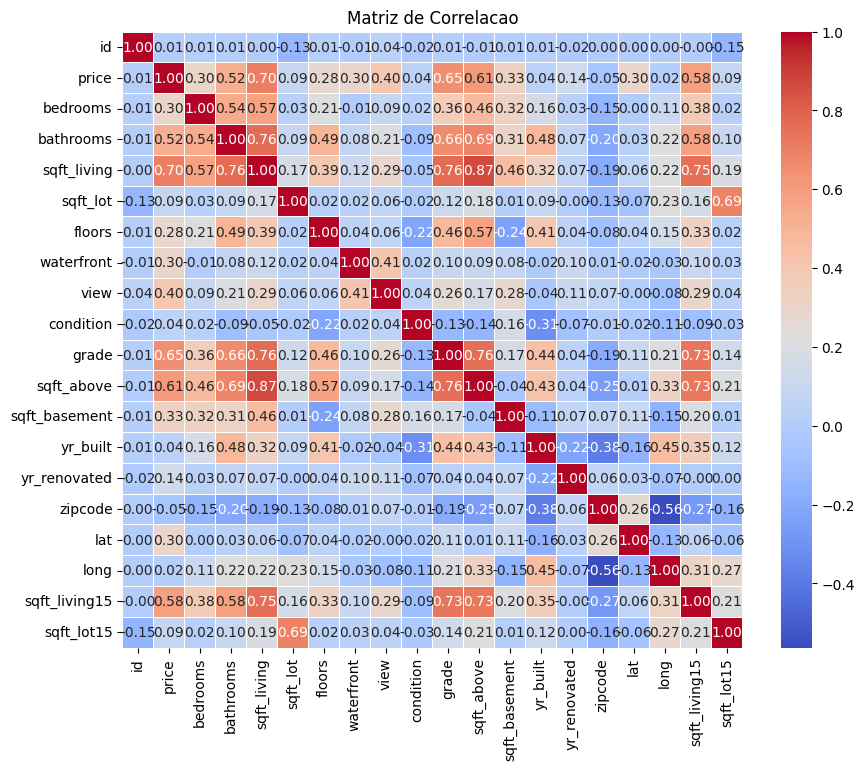

In [ ]:
# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlacao')
plt.show()

In [ ]:
correlation_price_bedrooms = correlation_matrix.loc['price', 'bedrooms']
print("Correlação entre 'price' e 'bedrooms':", correlation_price_bedrooms)

Correlação entre 'price' e 'bedrooms': 0.299207216169182


Correlação fraca

In [ ]:
# Filtrando o DataFrame para incluir apenas casas com 'sqft_living' superior a 2000
df_above_2000 = df_house[df_house['sqft_living'] > 2000]

# Calculando a correlação entre 'price' e 'bedrooms' para as casas acima de 2000 sqft_living
correlation_price_bedrooms_above_2000 = df_above_2000['price'].corr(df_above_2000['bedrooms'])

print("Correlação entre 'price' e 'bedrooms' para casas com sqft_living > 2000:", correlation_price_bedrooms_above_2000)

Correlação entre 'price' e 'bedrooms' para casas com sqft_living > 2000: 0.11912115548964147


Embora ambas as correlações sejam positivas, a diferença entre elas indica que a relação entre 'price' e 'bedrooms' é mais fraca quando consideramos apenas casas com uma área total 'sqft_living' superior a 2000 pés quadrados em comparação com o conjunto de dados completo.

### Questão 2

Existe alguma correlação entre o preço 'price' e a área total da casa 'sqft_living', considerando apenas casas com pelo menos dois banheiros 'bathrooms'?

In [ ]:
# Filtrando o DataFrame para incluir apenas casas com pelo menos dois banheiros
df_at_least_2_bathrooms = df_house[df_house['bathrooms'] >= 2]

# Calculando a correlação entre 'price' e 'sqft_living' para as casas com pelo menos dois banheiros
correlation_price_sqft_living_at_least_2_bathrooms = df_at_least_2_bathrooms['price'].corr(df_at_least_2_bathrooms['sqft_living'])

print("Correlação entre 'price' e 'sqft_living' para casas com pelo menos dois banheiros:", correlation_price_sqft_living_at_least_2_bathrooms)


Correlação entre 'price' e 'sqft_living' para casas com pelo menos dois banheiros: 0.7067107107996193


Correlação forte

### Questão 3

Como a quantidade de banheiros 'bathrooms' influencia na correlação entre a área total da casa 'sqft_living' e o preço 'price'?

In [ ]:
df_house['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 4.25, 3.75, 5.  , 0.  , 1.25, 0.5 , 5.5 , 5.25,
       6.75, 6.  , 5.75, 8.  , 7.5 , 7.75])

In [ ]:
df_house['bathrooms'].value_counts()

bathrooms
2.50    2290
1.00    1945
1.75    1502
2.00     955
2.25     938
1.50     713
2.75     534
3.00     332
3.50     270
3.25     228
3.75      65
4.00      56
4.50      43
4.25      38
0.75      37
5.00      12
4.75      11
0.00       7
5.50       5
1.25       4
5.25       4
6.75       2
6.00       2
5.75       2
0.50       1
8.00       1
7.50       1
7.75       1
Name: count, dtype: int64

In [ ]:
# Definir os intervalos de categorização
bins = [0, 1, 2, 3, 4, 5, 6, float('inf')]

# Definir os rótulos para cada categoria
labels = ['Até 1', 'Até 2', 'Até 3', 'Até 4', 'Até 5', 'Até 6', 'Mais de 6']

# Aplicar a função cut para criar as categorias
df_house['bathroom_categories'] = pd.cut(df_house['bathrooms'], bins=bins, labels=labels, right=False)

# Exibir as contagens de cada categoria
print(df_house['bathroom_categories'].value_counts())

bathroom_categories
Até 3        4717
Até 2        4164
Até 4         895
Até 5         148
Até 1          45
Até 6          23
Mais de 6       7
Name: count, dtype: int64


In [ ]:
# Calcular a correlação para cada categoria de banheiros
correlation_by_bathroom_category = df_house.groupby('bathroom_categories').apply(lambda x: x['sqft_living'].corr(x['price']))

print("Correlação entre 'sqft_living' e 'price' para cada categoria de banheiros:")
print(correlation_by_bathroom_category)

Correlação entre 'sqft_living' e 'price' para cada categoria de banheiros:
bathroom_categories
Até 1        0.785669
Até 2        0.459896
Até 3        0.569543
Até 4        0.594484
Até 5        0.660007
Até 6        0.796831
Mais de 6    0.842632
dtype: float64


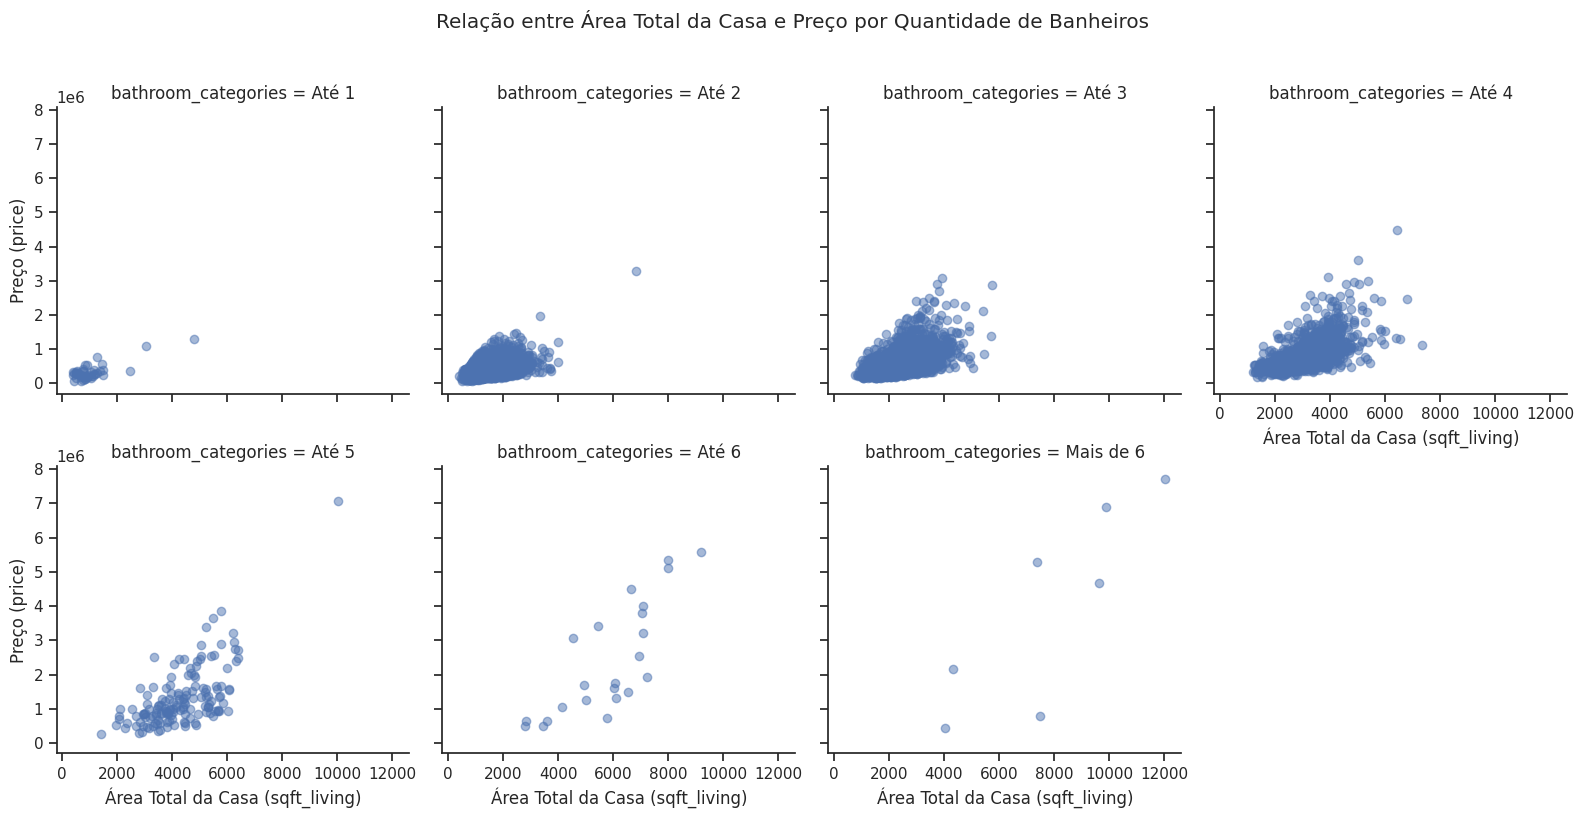

In [ ]:
# Criar a matriz de scatter plots
sns.set(style="ticks")
g = sns.FacetGrid(df_house, col="bathroom_categories", col_wrap=4, height=4)
g.map(plt.scatter, "sqft_living", "price", alpha=0.5)
g.set_axis_labels("Área Total da Casa (sqft_living)", "Preço (price)")
plt.suptitle('Relação entre Área Total da Casa e Preço por Quantidade de Banheiros', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
# Definir os intervalos de categorização
bins = [0, 2, 3, float('inf')]

# Definir os rótulos para cada categoria
labels = [ 'Até 2', '3', '3+']

# Aplicar a função cut para criar as categorias
df_house['bathroom_categories2'] = pd.cut(df_house['bathrooms'], bins=bins, labels=labels, right=False)

# Exibir as contagens de cada categoria
print(df_house['bathroom_categories2'].value_counts().sort_index())

bathroom_categories2
Até 2    4209
3        4717
3+       1073
Name: count, dtype: int64


In [ ]:
# Calcular a correlação para cada categoria de banheiros
correlation_by_bathroom_category2 = df_house.groupby('bathroom_categories2').apply(lambda x: x['sqft_living'].corr(x['price']))

print("Correlação entre 'sqft_living' e 'price' para cada categoria de banheiros:")
print(correlation_by_bathroom_category2)

Correlação entre 'sqft_living' e 'price' para cada categoria de banheiros:
bathroom_categories2
Até 2    0.467361
3        0.569543
3+       0.715869
dtype: float64


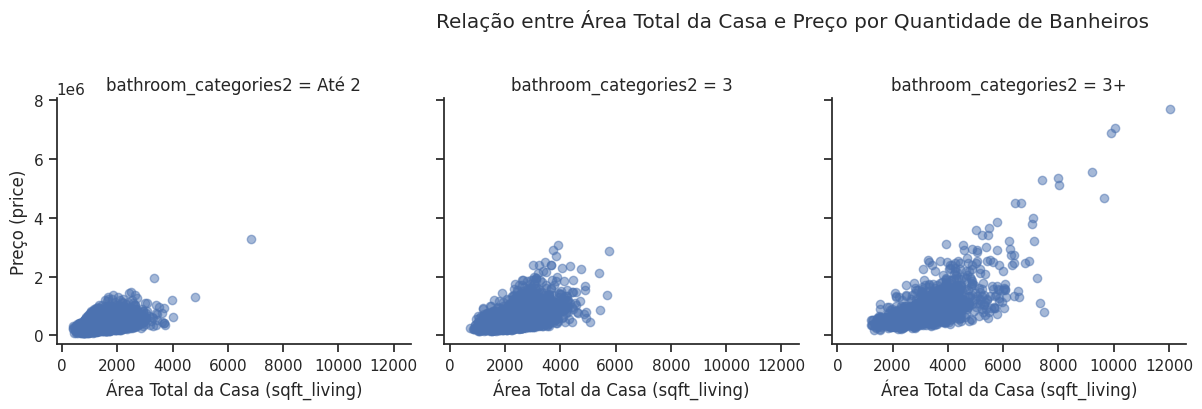

In [ ]:
# Criar a matriz de scatter plots
sns.set(style="ticks")
g = sns.FacetGrid(df_house, col="bathroom_categories2", col_wrap=4, height=4)
g.map(plt.scatter, "sqft_living", "price", alpha=0.5)
g.set_axis_labels("Área Total da Casa (sqft_living)", "Preço (price)")
plt.suptitle('Relação entre Área Total da Casa e Preço por Quantidade de Banheiros', y=1.02)
plt.tight_layout()
plt.show()

Quanto maior a quantidade de banheiros maior a correlação

### Questão 4

Qual é a relação entre a condição da casa 'condition' e o preço 'price', considerando apenas casas com uma área total 'sqft_living' superior a 3000 pésquadrados?

In [ ]:
df_house['condition'].value_counts()

condition
3    6190
4    2849
5     862
2      86
1      12
Name: count, dtype: int64

In [ ]:
# Filtrar o DataFrame para incluir apenas casas com 'sqft_living' superior a 3000
df_above_3000_sqft = df_house[df_house['sqft_living'] > 3000]

# Calcular a correlação entre 'condition' e 'price' para as casas acima de 3000 sqft_living
correlation_condition_price_above_3000_sqft = df_above_3000_sqft['condition'].corr(df_above_3000_sqft['price'])

print("Correlação entre 'condition' e 'price' para casas com sqft_living > 3000:", correlation_condition_price_above_3000_sqft)


Correlação entre 'condition' e 'price' para casas com sqft_living > 3000: 0.10527844723732609


Correlação fraca

### Questão 5

Existe alguma correlação entre a localização geográfica lat e long e o preço price para casas com pelo menos três quartos bedrooms?

In [ ]:
# Filtrar o DataFrame para incluir apenas casas com pelo menos três quartos
df_at_least_3_bedrooms = df_house[df_house['bedrooms'] >= 3]

# Calcular a correlação entre 'lat', 'long' e 'price' para as casas com pelo menos três quartos
correlation_lat_long_price = df_at_least_3_bedrooms[['lat', 'long', 'price']].corr()

print("Correlação entre 'lat', 'long' e 'price' para casas com pelo menos três quartos:")
print(correlation_lat_long_price)


Correlação entre 'lat', 'long' e 'price' para casas com pelo menos três quartos:
            lat      long     price
lat    1.000000 -0.122460  0.312555
long  -0.122460  1.000000 -0.007275
price  0.312555 -0.007275  1.000000


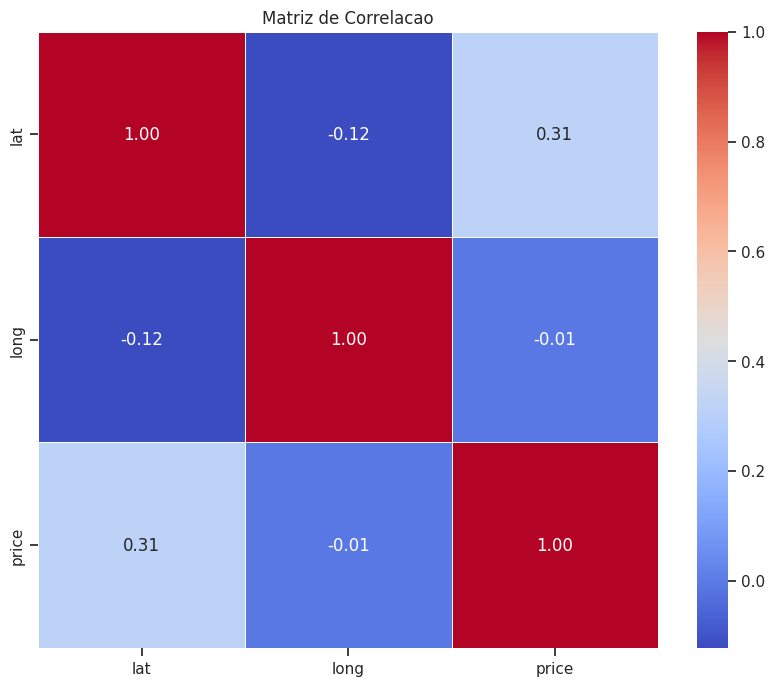

In [ ]:
# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_lat_long_price, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlacao')
plt.show()

A correlação é fraca. Entre longitude e preço é próxima de zero.

### Questão 6

Calcule a correlação entre uma variável categórica(waterfront) e uma variável numérica(price) usando ANOVA.

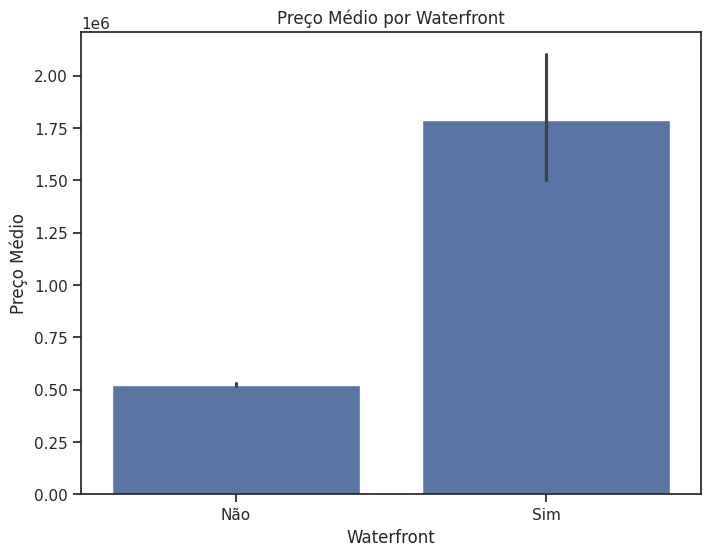

In [ ]:
# Criar um gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='waterfront', y='price', data=df_house)
plt.title('Preço Médio por Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Preço Médio')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.show()

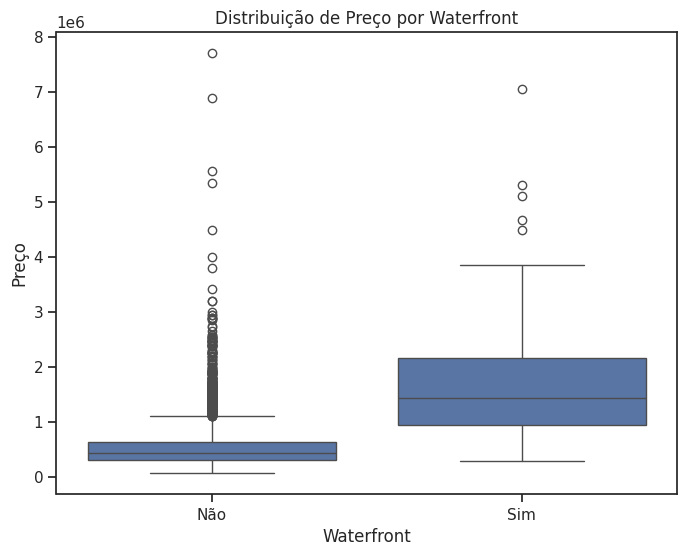

In [ ]:
# Criar um boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='waterfront', y='price', data=df_house)
plt.title('Distribuição de Preço por Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Preço')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.show()


In [ ]:
df_house['price'].value_counts()

price
350000.0    92
450000.0    82
550000.0    74
425000.0    73
250000.0    69
            ..
372220.0     1
334550.0     1
652427.0     1
548500.0     1
949950.0     1
Name: count, Length: 2289, dtype: int64

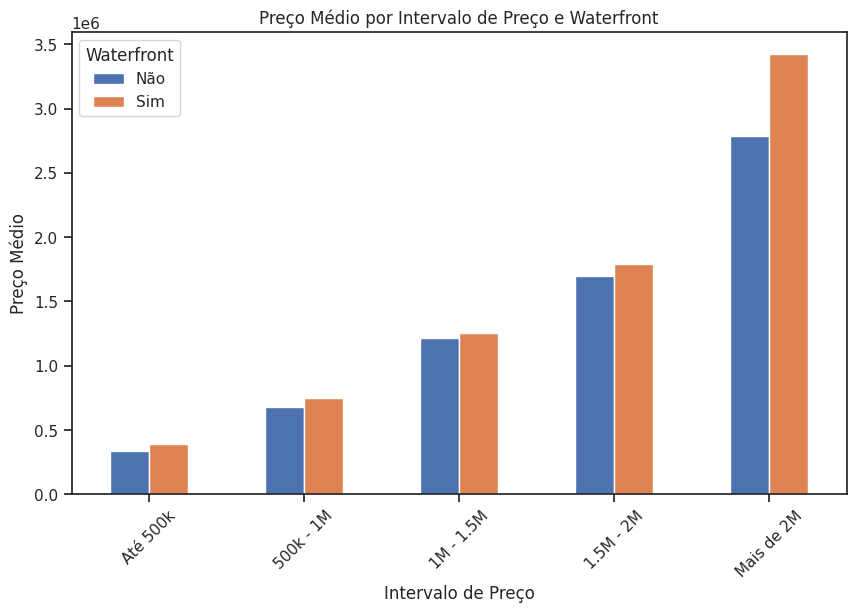

In [ ]:
# Definir os intervalos de preço
price_bins = [0, 500000, 1000000, 1500000, 2000000, float('inf')]

# Definir os rótulos para os intervalos
price_labels = ['Até 500k', '500k - 1M', '1M - 1.5M', '1.5M - 2M', 'Mais de 2M']

# Criar uma nova coluna no DataFrame com os intervalos de preço
df_house['price_interval'] = pd.cut(df_house['price'], bins=price_bins, labels=price_labels)

# Calcular o preço médio para cada intervalo de preço e para cada categoria de 'waterfront'
price_mean_by_waterfront = df_house.groupby(['price_interval', 'waterfront'])['price'].mean().unstack()

# Visualizar os preços médios por intervalo de preço e categoria de 'waterfront'
price_mean_by_waterfront.plot(kind='bar', figsize=(10, 6))
plt.title('Preço Médio por Intervalo de Preço e Waterfront')
plt.xlabel('Intervalo de Preço')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)
plt.legend(title='Waterfront', labels=['Não', 'Sim'])
plt.show()

In [ ]:
from scipy.stats import pointbiserialr

# Mapear os valores dos intervalos de preço para valores numéricos
price_interval_mapping = {'Até 500k': 0, '500k - 1M': 1, '1M - 1.5M': 2, '1.5M - 2M': 3, 'Mais de 2M': 4}
df_house['price_interval_numeric'] = df_house['price_interval'].map(price_interval_mapping)

# Calcular o coeficiente de correlação r_pb entre 'waterfront' e 'price_interval_numeric'
r_pb, p_value = pointbiserialr(df_house['waterfront'], df_house['price_interval_numeric'])

print("Coeficiente de correlação r_pb:", r_pb)
print("Valor-p:", p_value)

Coeficiente de correlação r_pb: 0.2322111953397499
Valor-p: 1.6072735860179623e-122


há uma correlação estatisticamente significativa e moderada entre a variável categórica 'waterfront' e a variável categórica 'price_interval'.

## Parte 2

In [ ]:
# importando o df
df_car = pd.read_csv('/content/drive/MyDrive/projeto_regressao/car_price.csv')
df_car

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,Maruti Suzuki,Ritz Vxi (ABS) BS-IV,245000,2014,79000,Petrol,Manual,Faridabad,White,Second,Individual,1197 cc,85 bhp @ 6000 rpm,113 Nm @ 4500 rpm,FWD,3775.0,1680.0,1620.0,5.0,43.0
1870,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
1871,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
1872,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0


In [ ]:
# análise geral dos dados
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

In [ ]:
df_car.duplicated().sum()

0

### Questão 7

Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.

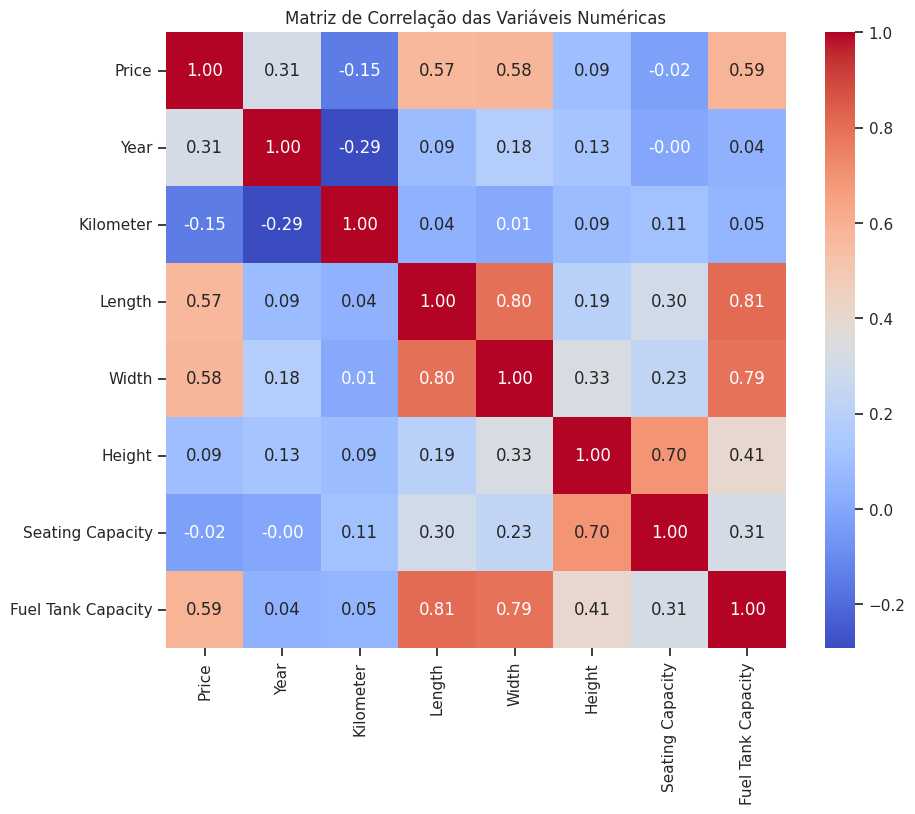

In [ ]:
# Selecionando apenas as variáveis numéricas
numeric_columns = df_car.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correlação
correlation_matrix = numeric_columns.corr()

# Exibindo a matriz de correlação usando um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

In [ ]:
def categorize_correlation(correlation_matrix):
    positive_correlations = []
    negative_correlations = []
    neutral_correlations = []

    for row in correlation_matrix.index:
        for col in correlation_matrix.columns:
            correlation_value = correlation_matrix.loc[row, col]
            if row != col:  # Evita correlação da variável com ela mesma
                if correlation_value > 0.1:
                    positive_correlations.append((row, col))
                elif correlation_value < -0.1:
                    negative_correlations.append((row, col))
                else:
                    neutral_correlations.append((row, col))

    return positive_correlations, negative_correlations, neutral_correlations

# Usando a função
positive, negative, neutral = categorize_correlation(correlation_matrix)

In [ ]:
print("Correlações positivas:")
for pair in positive:
    print(pair)

Correlações positivas:
('Price', 'Year')
('Price', 'Length')
('Price', 'Width')
('Price', 'Fuel Tank Capacity')
('Year', 'Price')
('Year', 'Width')
('Year', 'Height')
('Kilometer', 'Seating Capacity')
('Length', 'Price')
('Length', 'Width')
('Length', 'Height')
('Length', 'Seating Capacity')
('Length', 'Fuel Tank Capacity')
('Width', 'Price')
('Width', 'Year')
('Width', 'Length')
('Width', 'Height')
('Width', 'Seating Capacity')
('Width', 'Fuel Tank Capacity')
('Height', 'Year')
('Height', 'Length')
('Height', 'Width')
('Height', 'Seating Capacity')
('Height', 'Fuel Tank Capacity')
('Seating Capacity', 'Kilometer')
('Seating Capacity', 'Length')
('Seating Capacity', 'Width')
('Seating Capacity', 'Height')
('Seating Capacity', 'Fuel Tank Capacity')
('Fuel Tank Capacity', 'Price')
('Fuel Tank Capacity', 'Length')
('Fuel Tank Capacity', 'Width')
('Fuel Tank Capacity', 'Height')
('Fuel Tank Capacity', 'Seating Capacity')


In [ ]:
print("\nCorrelações neutras:")
for pair in neutral:
    print(pair)


Correlações neutras:
('Price', 'Height')
('Price', 'Seating Capacity')
('Year', 'Length')
('Year', 'Seating Capacity')
('Year', 'Fuel Tank Capacity')
('Kilometer', 'Length')
('Kilometer', 'Width')
('Kilometer', 'Height')
('Kilometer', 'Fuel Tank Capacity')
('Length', 'Year')
('Length', 'Kilometer')
('Width', 'Kilometer')
('Height', 'Price')
('Height', 'Kilometer')
('Seating Capacity', 'Price')
('Seating Capacity', 'Year')
('Fuel Tank Capacity', 'Year')
('Fuel Tank Capacity', 'Kilometer')


In [ ]:
print("\nCorrelações negativas:")
for pair in negative:
    print(pair)


Correlações negativas:
('Price', 'Kilometer')
('Year', 'Kilometer')
('Kilometer', 'Price')
('Kilometer', 'Year')


### Questão 8

Codifique e exiba Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse Price.

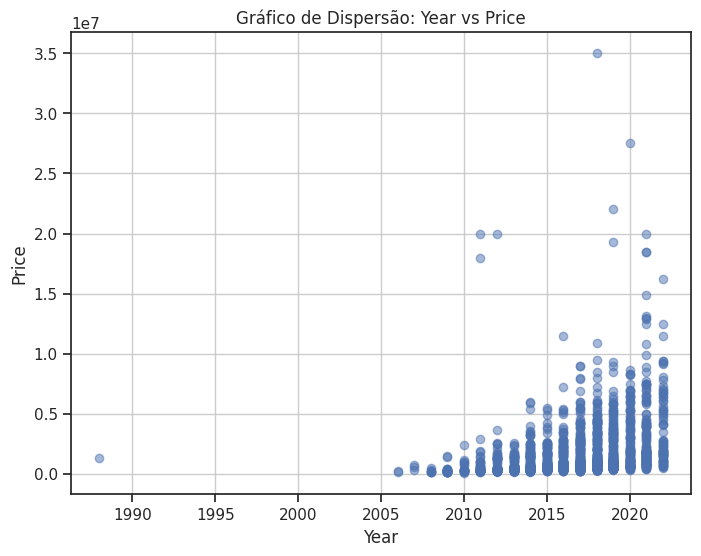

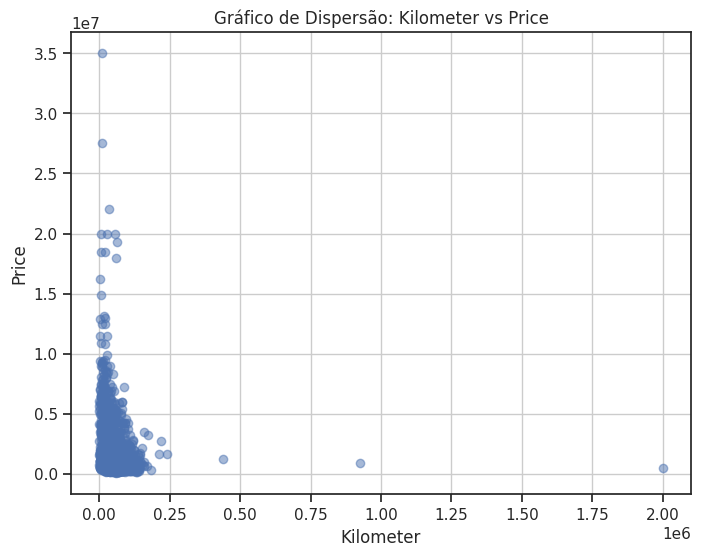

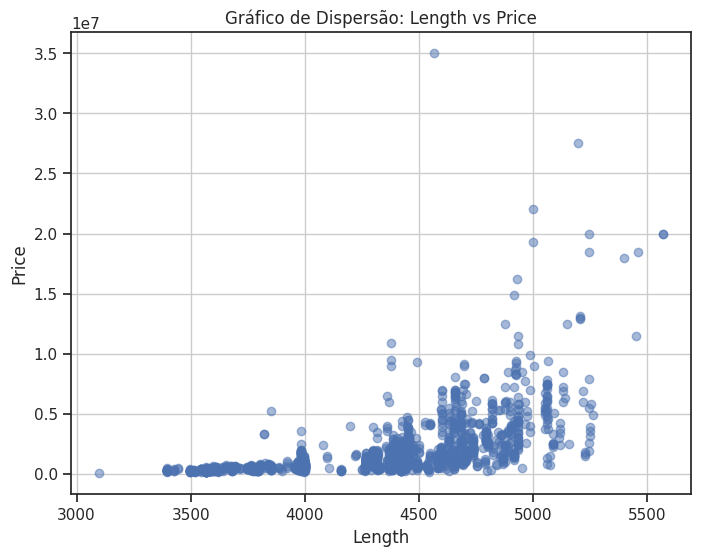

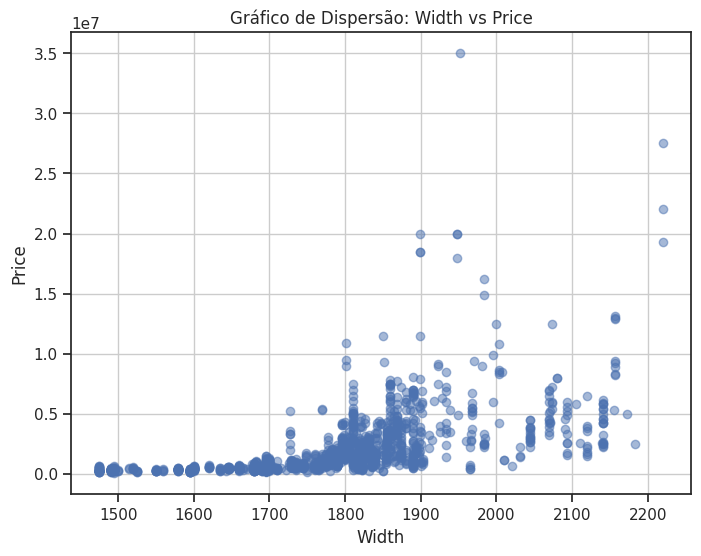

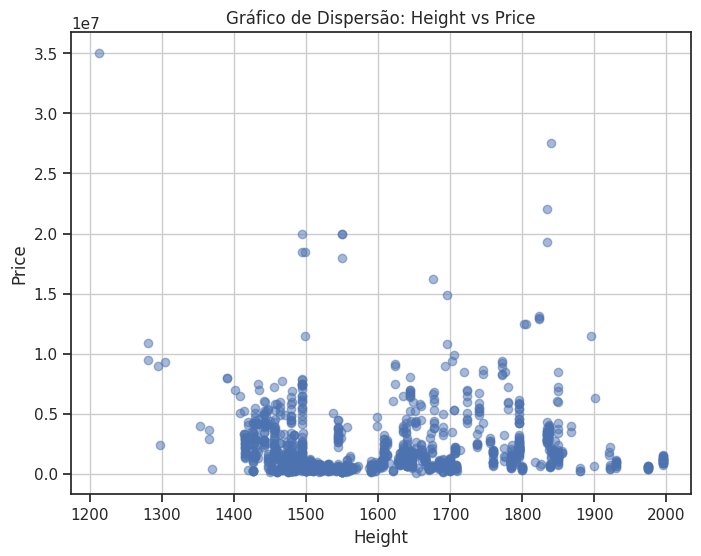

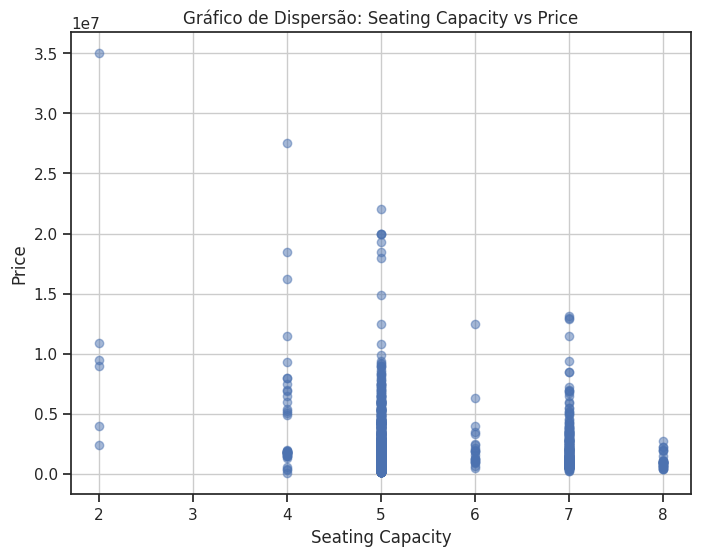

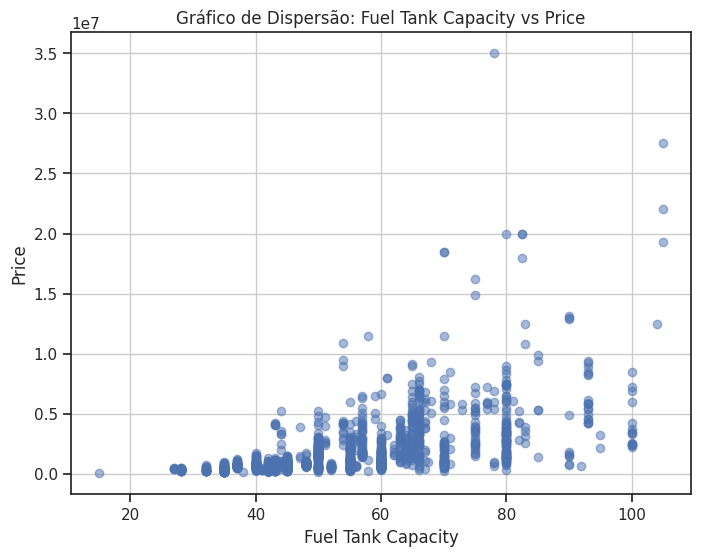

In [ ]:
# Selecionando apenas as variáveis numéricas
numeric_columns = df_car.select_dtypes(include=['int64', 'float64'])

# Plotando gráficos de dispersão para cada variável numérica em relação a 'Price'
for column in numeric_columns.columns:
    if column != 'Price':  # Evita plotar 'Price' contra 'Price'
        plt.figure(figsize=(8, 6))
        plt.scatter(df_car[column], df_car['Price'], alpha=0.5)
        plt.title(f'Gráfico de Dispersão: {column} vs Price')
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.grid(True)
        plt.show()

### Questão 9

Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     41.50
Date:                Wed, 15 May 2024   Prob (F-statistic):           1.49e-10
Time:                        20:50:21   Log-Likelihood:                -30189.
No. Observations:                1874   AIC:                         6.038e+04
Df Residuals:                    1872   BIC:                         6.039e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.041e+06   7.48e+04     27.302      0.0

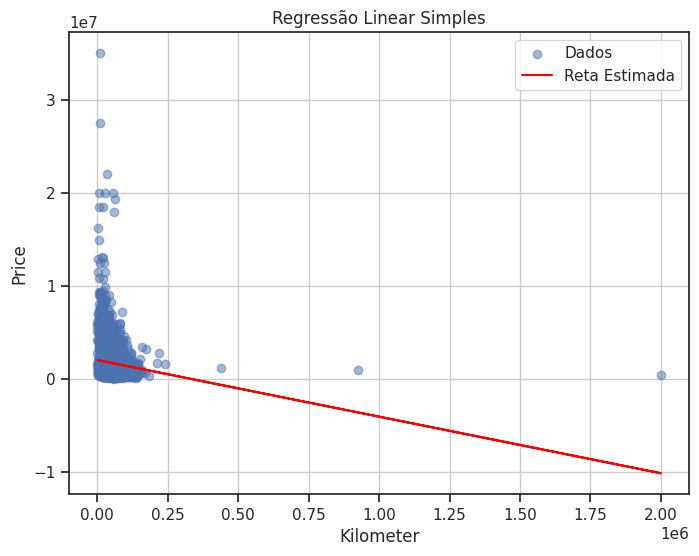

In [ ]:
import statsmodels.api as sm

# Variáveis para a regressão linear simples
X = df_car['Kilometer']  # Variável independente
y = df_car['Price']  # Variável dependente

# Adicionando uma constante ao X para incluir o intercepto na regressão
X = sm.add_constant(X)

# Criando o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exibindo a tabela de regressão
print(model.summary())

# Plotando a reta estimada
plt.figure(figsize=(8, 6))
plt.scatter(df_car['Kilometer'], df_car['Price'], alpha=0.5, label='Dados')
plt.plot(df_car['Kilometer'], model.predict(X), color='red', label='Reta Estimada')
plt.title('Regressão Linear Simples')
plt.xlabel('Kilometer')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### Questão 10


Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.

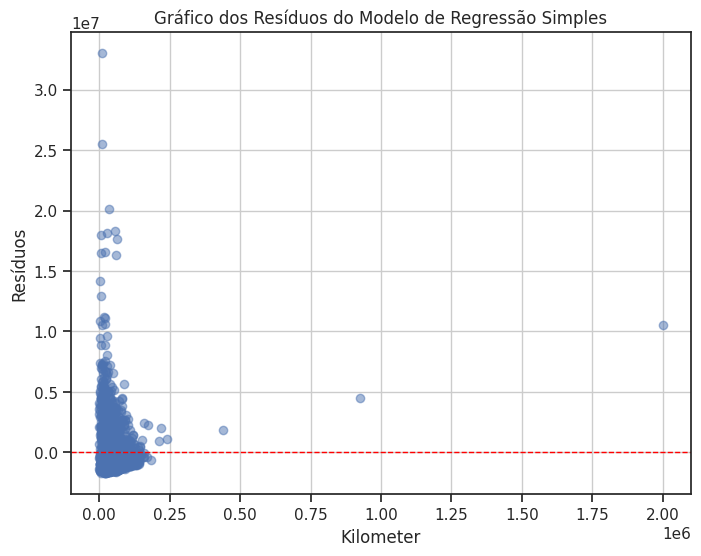

In [ ]:
# Calculando os resíduos do modelo
residuals = y - model.predict(X)

# Plotando o gráfico dos resíduos
plt.figure(figsize=(8, 6))
plt.scatter(df_car['Kilometer'], residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Linha horizontal em y=0
plt.title('Gráfico dos Resíduos do Modelo de Regressão Simples')
plt.xlabel('Kilometer')
plt.ylabel('Resíduos')
plt.grid(True)
plt.show()


### Questão 11

Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     270.7
Date:                Wed, 15 May 2024   Prob (F-statistic):          1.49e-278
Time:                        20:50:22   Log-Likelihood:                -29553.
No. Observations:                1874   AIC:                         5.912e+04
Df Residuals:                    1866   BIC:                         5.917e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.677e+08   2.77

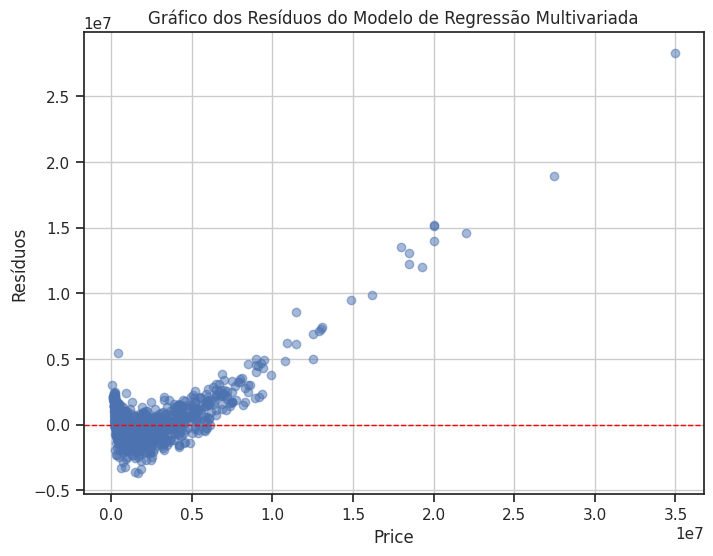

In [ ]:
# Variáveis para a regressão multivariada
X = df_car[['Year', 'Kilometer', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']]  # Variáveis independentes
y = df_car['Price']  # Variável dependente

# Adicionando uma constante ao X para incluir o intercepto na regressão
X = sm.add_constant(X)

# Criando o modelo de regressão multivariada
model = sm.OLS(y, X).fit()

# Exibindo a tabela de regressão
print(model.summary())

# Calculando os resíduos do modelo
residuals = y - model.predict(X)

# Plotando o gráfico dos resíduos
plt.figure(figsize=(8, 6))
plt.scatter(y, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Linha horizontal em y=0
plt.title('Gráfico dos Resíduos do Modelo de Regressão Multivariada')
plt.xlabel('Price')
plt.ylabel('Resíduos')
plt.grid(True)
plt.show()